# Solving classification problem using Machine Learning
### 1. A large travel agency is looking to predict whether a flight will be canceled based on information provided in the data set. The agency can sell tickets for only three airlines (AA, UA, and DL) and would like to be able to advise its customers on which airlines has the least cancellation.

Using the dataset provided:

1. Build a model to predict whether a flight will be cancelled. 
2. Provide a recommendation on which flight carrier is most reliable. 

#### Information about the dataset
Field            | Name Type | Description
-----------------|-----------|----------------------------------
Canceled         | Binary    | Canceled = 1
Month            | Integer   | Jan = 1
DepartureTime    | Integer   | Military Time (1:00 PM = 1300)
UniqueCarrier    | String    | Airline Carrier Code
SchedElapsedTime | Integer   | Scheduled Flight time in minutes
ArrDelay         | Integer   | Arrival delay in minutes
DepDelay         | Integer   | Departure delay in minutes
Distance         | Integer   | Distance in miles

## Basic Imports

In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# Pickle for saving model output
import pickle

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcdefaults()
import numpy as np
import matplotlib.patches as mpatches

# Set default font size
plt.rcParams['font.size'] = 24

from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Plotly for additional visualization
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
#import plotly.offline as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

# train_test_split function from sklearn to split the dataset
from sklearn.model_selection import train_test_split

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## Data Cleaning and Formatting
### Load in the Data and Examine
First and foremost step in any data analysis should be to get a basic understanding of data, followed by cleaning. A cleaned data set prevents "garbage-in equals garbage-out type situation". For this demonstration I will be using pandas dataframe to analyze the dataset. However, there are other dataframes available like Spark and it is my personal choice to use pandas dataframe here. 

In [2]:
# Read in data into a dataframe
flight_delay_data = pd.read_csv("./FlightDelays_Data_3.0.csv")

# Display top of dataframe
flight_delay_data.head()

,Canceled,Month,DepartureTime,UniqueCarrier,SchedElapsedTime,ArrDelay,DepDelay,Distance
0,1.0,12,814,UA,134.0,0.0,0,679.0
1,1.0,12,830,DL,90.0,0.0,0,214.0
2,1.0,1,1835,UA,213.0,0.0,0,1605.0
3,1.0,4,1730,AA,80.0,0.0,0,235.0
4,1.0,7,1442,UA,103.0,0.0,0,413.0


## Data Types and Missing Values
The dataframe.info() method is a quick way to assess the data by displaying the data types of each column and the number of non-missing values. Looking at the output below, it is comforting to find that except for a few missing values in "SchedElapsedTime", "Canceled", "ArrDelay", "Distance", there are no major data quality issues. In that case we'll dive straight into exploratory analysis of data. 

In [3]:
# See the column data types and non-missing values
flight_delay_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
Canceled            5999 non-null float64
Month               6000 non-null int64
DepartureTime       6000 non-null int64
UniqueCarrier       6000 non-null object
SchedElapsedTime    5998 non-null float64
ArrDelay            5999 non-null float64
DepDelay            6000 non-null int64
Distance            5999 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 375.1+ KB


For Machine Learning models, it is important to swap categorical (string type) columns into integers.  

In [4]:
# Based on the above information, replacing airline carrier string type with integer type values
flight_delay_data.UniqueCarrier[flight_delay_data.UniqueCarrier == 'AA'] = 1
flight_delay_data.UniqueCarrier[flight_delay_data.UniqueCarrier == 'DL'] = 2
flight_delay_data.UniqueCarrier[flight_delay_data.UniqueCarrier == 'UA'] = 3
flight_delay_data.head()

,Canceled,Month,DepartureTime,UniqueCarrier,SchedElapsedTime,ArrDelay,DepDelay,Distance
0,1.0,12,814,3,134.0,0.0,0,679.0
1,1.0,12,830,2,90.0,0.0,0,214.0
2,1.0,1,1835,3,213.0,0.0,0,1605.0
3,1.0,4,1730,1,80.0,0.0,0,235.0
4,1.0,7,1442,3,103.0,0.0,0,413.0


In [5]:
# Record that contains missing value for Distance column
flight_delay_data[flight_delay_data['Distance'].isnull()]

,Canceled,Month,DepartureTime,UniqueCarrier,SchedElapsedTime,ArrDelay,DepDelay,Distance
189,1.0,12,1415,1,255.0,0.0,0,NaN


In [6]:
# Record that contains missing value for SchedElapsedTime column
flight_delay_data[flight_delay_data['SchedElapsedTime'].isnull()]

,Canceled,Month,DepartureTime,UniqueCarrier,SchedElapsedTime,ArrDelay,DepDelay,Distance
1205,0.0,4,2225,2,NaN,-1.0,-1,2586.0
1558,0.0,1,1325,1,NaN,-10.0,-2,1235.0


In [7]:
# Record that contains missing value for Canceled column
flight_delay_data[flight_delay_data['Canceled'].isnull()]

,Canceled,Month,DepartureTime,UniqueCarrier,SchedElapsedTime,ArrDelay,DepDelay,Distance
2542,NaN,6,845,3,85.0,-5.0,-4,416.0


In [8]:
# Our dataset contains null values, that must be replaced with 0 for us to model. 
flight_delay_data.fillna(0, inplace=True)

In [9]:
flight_delay_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
Canceled            6000 non-null float64
Month               6000 non-null int64
DepartureTime       6000 non-null int64
UniqueCarrier       6000 non-null int64
SchedElapsedTime    6000 non-null float64
ArrDelay            6000 non-null float64
DepDelay            6000 non-null int64
Distance            6000 non-null float64
dtypes: float64(4), int64(4)
memory usage: 375.1 KB


All null values have been replaced with zeros. Now this data set is ready for machine learning models. 

## Exploratory Data Analysis (EDA)
EDA is an open-ended process where we make plots and calculate statistics in order to explore our data. The purpose is to find anomalies, patterns, trends or relationships. These may be interesting by themselves (for example finding a correlation between two variables) or they can be used to inform modeling decisions such as which features to use. In short, the goal of EDA is to determine what our data can tell us. EDA generally starts out with a high-level overview, and then narrows in to specific parts of the dataset once as find interesting areas to examine. 

#### To begin the EDA, we will focus on univariate analysis (single variables) first. 

In [10]:
# Find unique carriers in our dataset
flight_delay_data.UniqueCarrier.unique()

array([3, 2, 1])

In [11]:
flight_delay_data['Distance'].describe()

count     6000.000000
mean       991.025500
std        685.747658
min       -439.000000
25%        547.000000
50%        837.000000
75%       1249.000000
max      15990.000000
Name: Distance, dtype: float64

## Single variable plots
A single variable (also known as univariate) plot show the distribution of distance travelled regardless of airline type.  

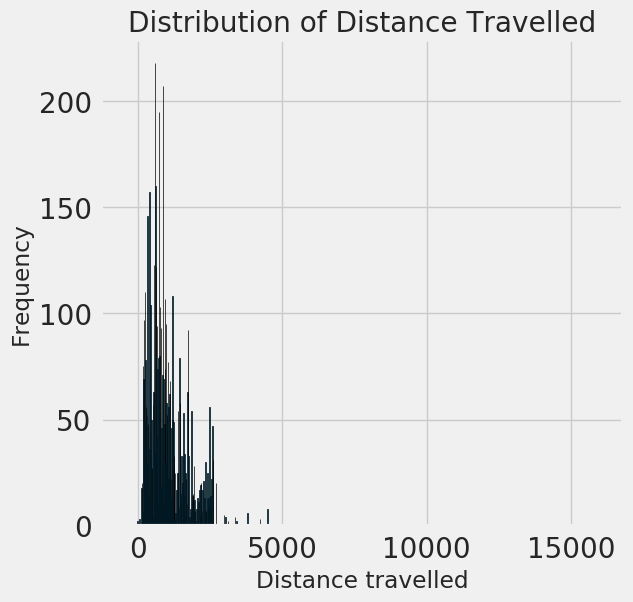

In [12]:
def plotDistance(data, flag, nbins):
    figsize(6, 6)

    # Histogram of Distance travelled
    plt.style.use('fivethirtyeight')
    #plt.hist(flight_delay_data['Distance'].dropna(), bins = 1000, edgecolor = 'k');
    plt.hist(data.dropna(), bins = nbins, edgecolor = 'k');
    if(flag == 'True'):
        plt.yscale('log')
    else:
        plt.yscale('linear')
    plt.xlabel('Distance travelled'); plt.ylabel('Frequency'); 
    plt.title('Distribution of Distance Travelled');
    plt.show();

plotDistance(flight_delay_data['Distance'], False, 1000)

Above plot displays very sparse values for distance greater than approximately 3000 miles. I would like to visualize a log scale plot to be able to assess outliers in distance. Assuming that these data correspond to domestic flights only within the United States, it is important to cautiously remove data points that might result in biased and/or incorrect predictions for flight cancellations. 

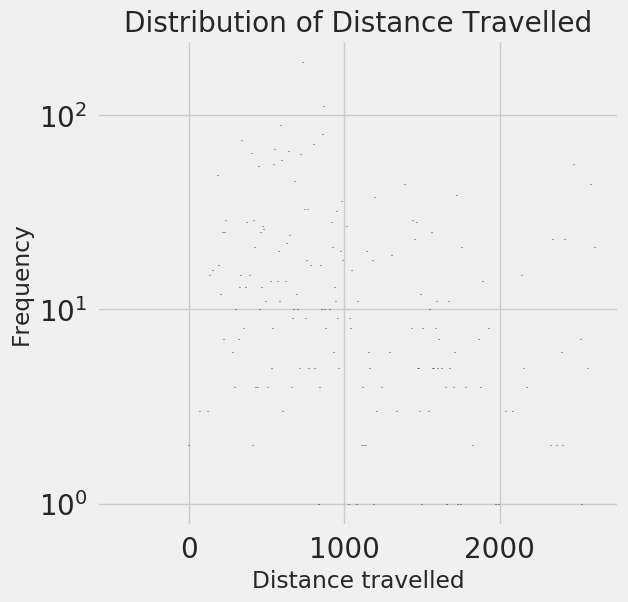

In [73]:
plotDistance(flight_delay_data['Distance'], 'True', 1000)

As suspected, "distance" has Landau type distribution with a long tail. Again, assuming that these flights are domestic flights only, next step is to come up with a strategy for removing these data points. I can't emphasize enough that it is extremely important to exercise caution in removing any data points. 

### Removing the outliers
When we remove outliers, we want to be careful that we are not throwing away measurements just because they look strange. They may be result of an actual phenomenon that we should further investigate. When removing outliers, I try to be as conservative as possible.
    - On the low end, an extreme outlier is below First Quartile - 3*Interquartile Range
    - On the high end, an extreme outlier is above First Quartile + 3*Interquartile Range

In [14]:
# Calculate the first and third quartile
first_quartile = flight_delay_data['Distance'].describe()['25%']
third_quartile = flight_delay_data['Distance'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers with large distances only
flight_delay_data = flight_delay_data[(flight_delay_data['Distance'] < (first_quartile + 3 * iqr))]

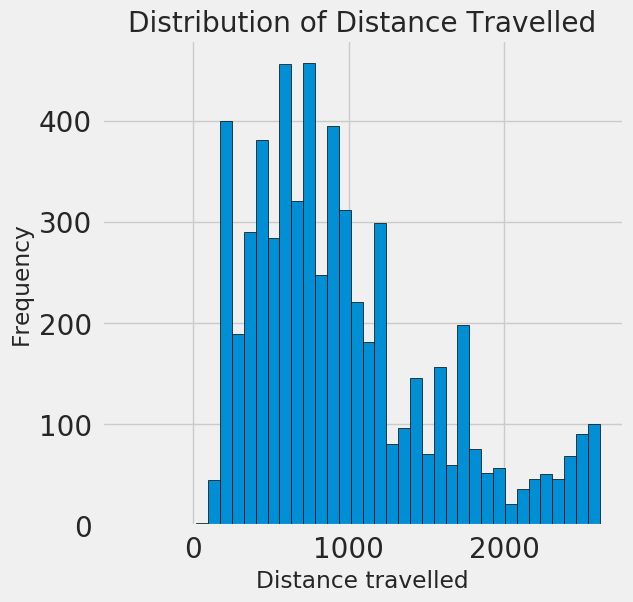

In [19]:
plotDistance(flight_delay_data['Distance'], 'False', 40)

In [15]:
# Check to see if data points have been dropped. 
flight_delay_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5939 entries, 0 to 5999
Data columns (total 8 columns):
Canceled            5939 non-null float64
Month               5939 non-null int64
DepartureTime       5939 non-null int64
UniqueCarrier       5939 non-null int64
SchedElapsedTime    5939 non-null float64
ArrDelay            5939 non-null float64
DepDelay            5939 non-null int64
Distance            5939 non-null float64
dtypes: float64(4), int64(4)
memory usage: 417.6 KB


In [16]:
# Copy dataframe to cross-validate [used later in the analysis for feature extraction]
flight_delay_data_copy = flight_delay_data
flight_delay_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5939 entries, 0 to 5999
Data columns (total 8 columns):
Canceled            5939 non-null float64
Month               5939 non-null int64
DepartureTime       5939 non-null int64
UniqueCarrier       5939 non-null int64
SchedElapsedTime    5939 non-null float64
ArrDelay            5939 non-null float64
DepDelay            5939 non-null int64
Distance            5939 non-null float64
dtypes: float64(4), int64(4)
memory usage: 417.6 KB


This plot looks a little less suspicious but has a right skew to it. 

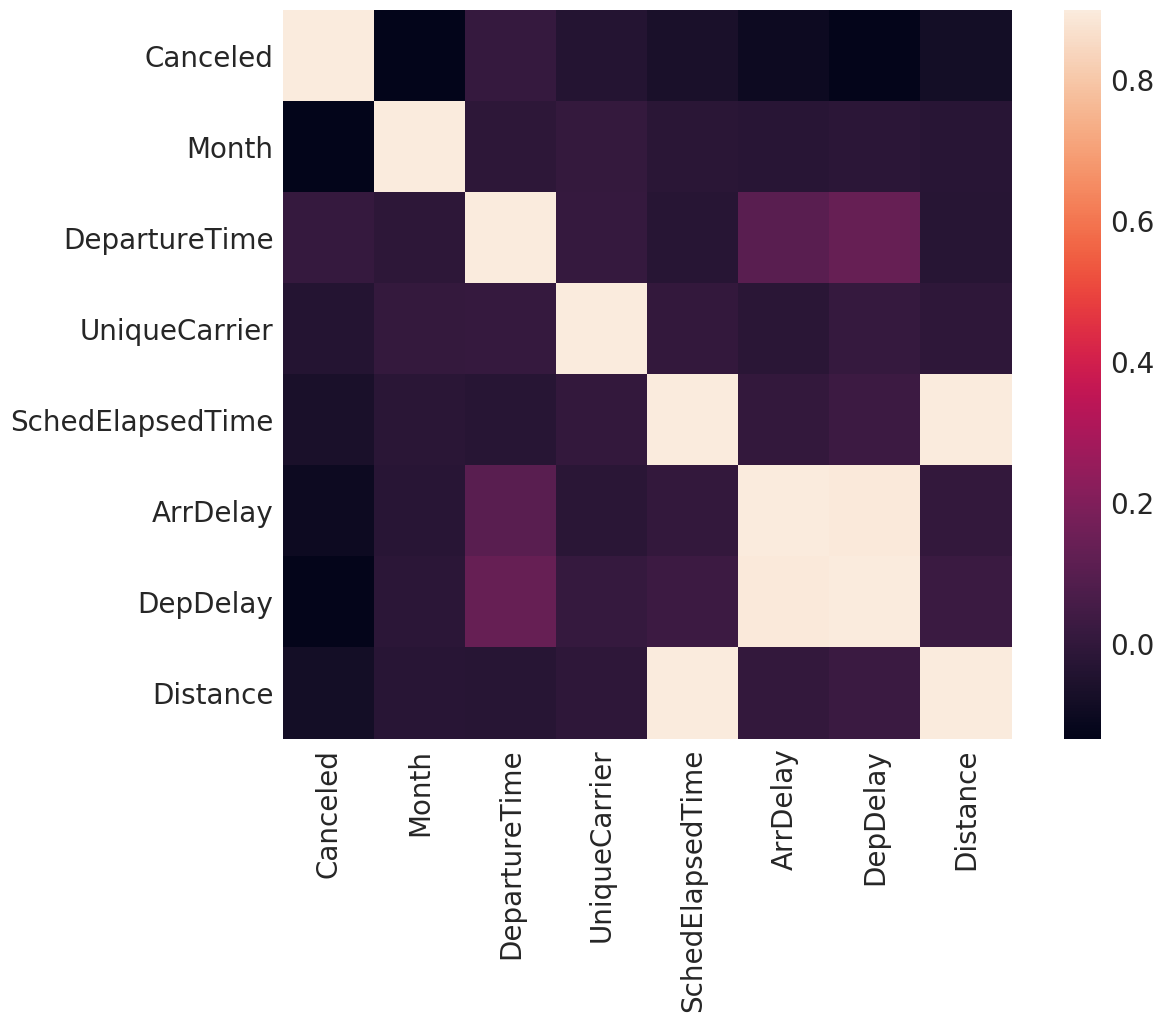

In [17]:
# Finding correlation between different variables (heatmap). 
color = sns.color_palette()
sns.set_style('darkgrid')

#Correlation map to see how features are correlated with Canceled
correlation_matrix = flight_delay_data.corr()
plt.subplots(figsize=(12,9))
_=sns.heatmap(correlation_matrix, vmax=0.9, square=True);
plt.show()

A heat map is a powerful tool to visualie correlation between all the variables in a give data set.  
The above correlation matrix plot makes perfect sense. 
- Canceled column has a negative correlation with "Month", "SchedElapsedTime", "ArrDelay", "DepDelay", and "Distance."
- Canceled column DOES NOT depend "DepartureTime".
- Arrival delay (ArrDelay) happens when there was a departure delay (DepDelay). These two variables are highly correlated, as they should be!
- Given the dataset, cancellations could happen due weather conditions. They could also happen due a technical snag, but we don't have that information available to us. So we will work with the "Month" column.

## Most used airline carrier
I would like to get a feel for the most used airline carrier and also cancellation record for that airline in this dataset.

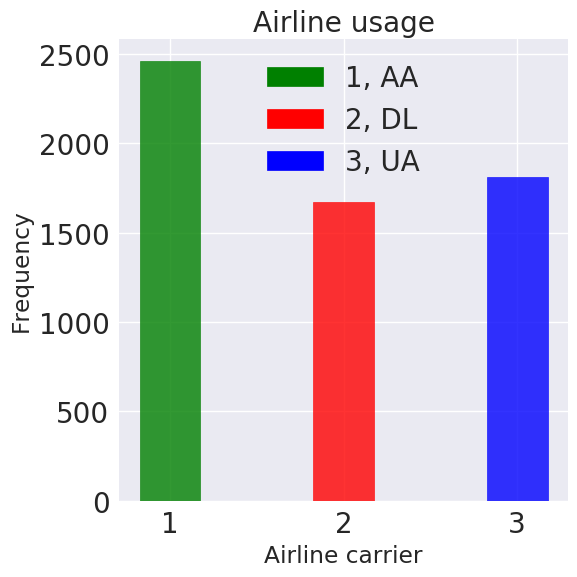

In [22]:
airline_count = flight_delay_data['UniqueCarrier'].value_counts()
fig, ax = plt.subplots()
index = airline_count.index[::-1]
bar_width = 0.35
opacity = 0.8

#rects1 = plt.bar(index, airline_count.values[::-1], bar_width, alpha=opacity, color='b', label='Frank')
rects1 = plt.bar(index, airline_count.values[::-1], bar_width, alpha=opacity, label='Frank')
rects1[0].set_color('r')
rects1[1].set_color('b')
rects1[2].set_color('g')
AAlegend = mpatches.Patch(color='green', label='AA')
DLlegend = mpatches.Patch(color='red', label='DL')
UAlegend = mpatches.Patch(color='blue', label='UA')


plt.xlabel('Airline carrier')
plt.ylabel('Frequency')
plt.title('Airline usage')

plt.tight_layout()
plt.legend(handles=[AAlegend, DLlegend, UAlegend])
plt.show()

In [32]:
# Finding cancellation rate for individual airline carriers. Notice that the sum of unique carriers for 
# 0 or for 1 is still 5908

flight_delay_data.pivot_table(index=['UniqueCarrier'], columns='Canceled', aggfunc='size', fill_value=0)

Canceled,0.0,1.0
UniqueCarrier,,
1,1967,492
2,1482,188
3,1495,315


# Take away messages:
1. Above numbers are no surprise that AA carrier is the most used airline based on the dataset, with a percentage usage of 41% compared to 30% for UA and 28% for DL.
2. The AA airline is 80% reliable for NOT being canceled, while 81% reliability for UA and ~90% reliability for DL carrier. 

### Visualization of canceled vs non-canceled flights for each carrier

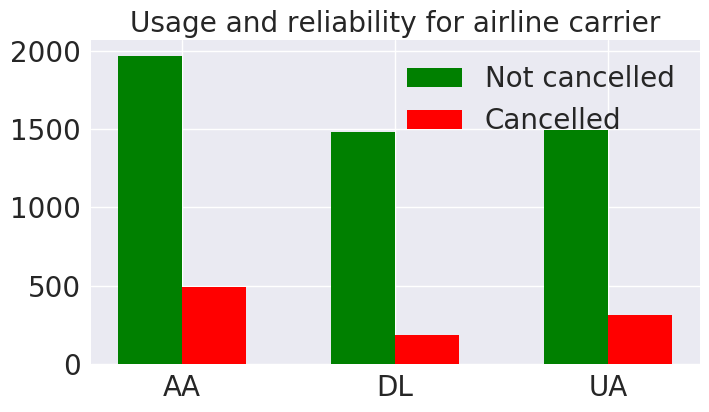

In [55]:
N = 3
airlineUsage=(1967, 1482, 1495)

fig, ax = plt.subplots()

ind = np.arange(N)    # the x locations for the groups
width = 0.3         # the width of the bars
p1 = ax.bar(ind, airlineUsage, width, color='g', bottom=0)


airlineCancellation = (492, 188, 315)
p2 = ax.bar(ind + width, airlineCancellation, width,
            color='r', bottom=0)

ax.set_title('Usage and reliability for airline carrier')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('AA', 'DL', 'UA'))

ax.legend((p1[0], p2[0]), ('Not cancelled', 'Cancelled'))
ax.autoscale_view()
plt.show()

### Percentage of reliability for each carrier

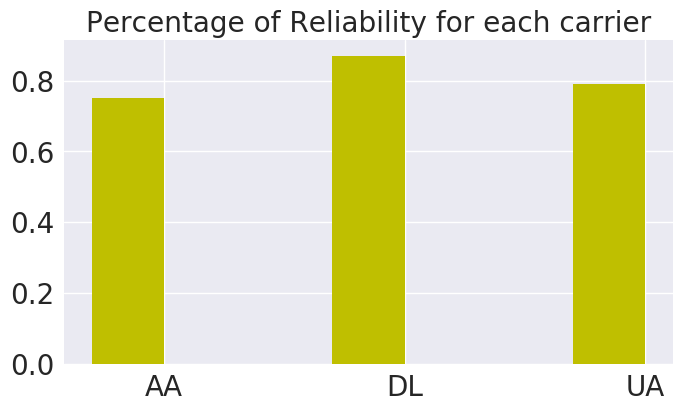

In [57]:
N = 3
airlineUsage=(0.75, 0.87, 0.79)

fig, ax = plt.subplots()

ind = np.arange(N)    # the x locations for the groups
width = 0.3         # the width of the bars
p1 = ax.bar(ind, airlineUsage, width, color='y', bottom=0)

ax.set_title('Percentage of Reliability for each carrier')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('AA', 'DL', 'UA'))

ax.autoscale_view()
plt.show()

## Bivariate analysis based on Month

In [26]:
# Count of month-wise usage (including 0 and 1) for each airline carrier
# 'AA' = 1
# 'DL' = 2
# 'UA' = 3

groups = flight_delay_data.groupby(by=['UniqueCarrier'])['Month'].value_counts()

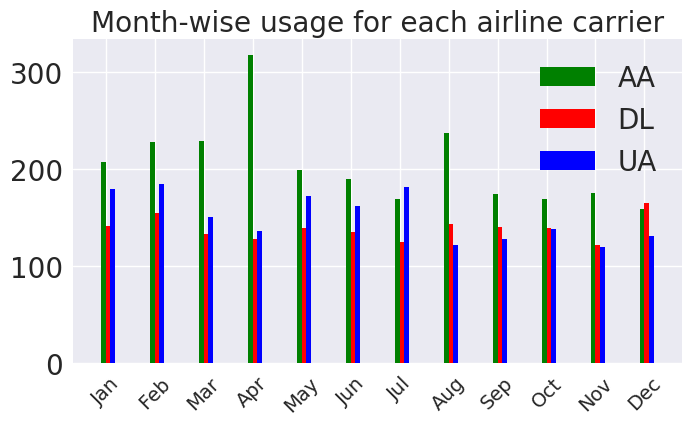

In [64]:
N = 12
monthlyUsageAA=(208,228,229,318,199,190,170,237,175,170,176,159)

fig, ax = plt.subplots()

ind = np.arange(N)    # the x locations for the groups
width = 0.1         # the width of the bars
p1 = ax.bar(ind, monthlyUsageAA, width, color='g', bottom=0)


monthlyUsageDL=(142,155,133,128,140,135,125,144,141,140,122,165)
p2 = ax.bar(ind + width, monthlyUsageDL, width,
            color='r', bottom=0)

monthlyUsageUA=(180,185,151,137,173,162,182,122,128,139,120,131)
p3 = ax.bar(ind + 2*width, monthlyUsageUA, width,
            color='b', bottom=0)


ax.set_title('Month-wise usage for each airline carrier')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))

ax.legend((p1[0], p2[0], p3[0]), ('AA', 'DL', 'UA'))
ax.autoscale_view()
plt.xticks(fontsize=14, rotation=45)
plt.show()

In [28]:
# Count of month-wise cancellations for each airline carrier
cancel = flight_delay_data.groupby(by=['UniqueCarrier','Month'])['Canceled'].value_counts()

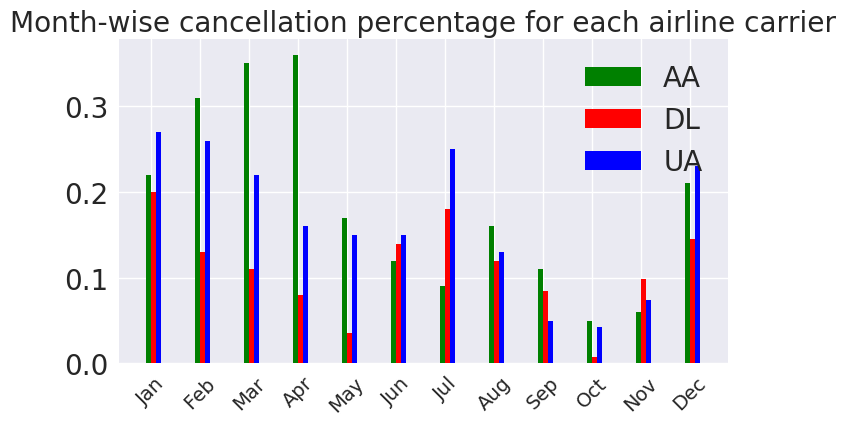

In [70]:
# Visualization of month-wise percentage cancellation for each airline carrier

N = 12
monthlyCancellationAA=(0.22,0.31,0.35,0.36,0.17,0.12,0.09,0.16,0.11,0.05,0.06,0.21)

fig, ax = plt.subplots()

ind = np.arange(N)    # the x locations for the groups
width = 0.1         # the width of the bars
p1 = ax.bar(ind, monthlyCancellationAA, width, color='g', bottom=0)


monthlyCancellationDL=(0.20,0.13,0.11,0.08,0.036,0.139,0.18,0.12,0.085,0.007,0.098,0.145)
p2 = ax.bar(ind + width, monthlyCancellationDL, width,
            color='r', bottom=0)

monthlyCancellationUA=(0.27,0.26,0.22,0.16,0.15,0.15,0.25,0.13,0.05,0.043,0.074,0.23)
p3 = ax.bar(ind + 2*width, monthlyCancellationUA, width,
            color='b', bottom=0)


ax.set_title('Month-wise cancellation percentage for each airline carrier')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))

ax.legend((p1[0], p2[0], p3[0]), ('AA', 'DL', 'UA'), loc='upper right')
ax.autoscale_view()
plt.xticks(fontsize=14, rotation=45)
plt.show()

## Take-away message
Instead of looking at the absolute numbers, it is important to look at relative percentage values. Above plot displays month-wise percentage of cancellations for each airline carrier. It is interesting to find out that AA has the highest percentage in the month of April. The trend of cancellation for AA rises from January to April, while the trend is opposite for the other two airlines.

As expected, weather plays an important in flight cancellations. In my opinion we are missing an important piece of information in dataset, which is region.

# Preparing for model prediction

Now that we know the dataset well, we are ready to train a model and predict the required solution. There are many predictive models available in the market for us to choose from. The given problem is a typical categorical problem, for example the expected outcome is '0' or '1'. Based on the nature of the problem, it makes sense to use the following models:

- Logistics Regression
- KNN or k-nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random forest
- Perceptron

In [30]:
# Creating train and test datasets
train_df = flight_delay_data.drop('Canceled', axis=1)
test_df = flight_delay_data['Canceled']

In [31]:
# Spliting the dataset into testing (20%) and training (80%) pieces
X_train, X_test, y_train, y_test = train_test_split(train_df, test_df, test_size=0.2)

print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(4751, 7) (4751,)
(1188, 7) (1188,)


# Logistic Regression
Logistic regression measures the relationship between the categorical dependent variable (features) and one or more independent variables by estimating probabilities using a logistic function, which is the cumulative logistic distribution.

In [32]:
# Logistics Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train)*100, 2)
acc_log

82.93

In [33]:
# Testing the model to predict on the test data
# save the model to disk
filename = 'LogisticRegressionModel.sav'
pickle.dump(logreg, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = round(loaded_model.score(X_test, y_test)*100, 2)
print(result)

84.43


In [34]:
# Check to see why Logistic regression model is only 82% accurate. 
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
3,ArrDelay,0.007202
4,DepDelay,0.004314
1,UniqueCarrier,0.000048
5,Distance,-0.042595
0,DepartureTime,-0.132473
2,SchedElapsedTime,-0.215550


Interestingly, Logistic Regression model doesn't take "Month" into account while predicting the cancellations. Which perhaps explains why this model performs less compared to other models below. 

## Support Vector Machines

Next we model using Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. 

Note that the model generates a confidence score which is higher than Logistics Regression model.

In [35]:
# Support Vector Machines
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train)*100,2)
acc_svc

99.87

## k-Nearest Neighbors

k-Nearest neighbors algorithm (or k-NN for short) is a non-parametric method used for classification problems in pattern regosgnition. 

A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

KNN confidence score is better than Logistics Regression but worse than SVM.


In [36]:
#KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

88.04

## Gaussian Naive Bayes
In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based 
on applying Bayes' theorem with strong (naive) independence assumptions between the features. 
Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the 
number of variables (features) in a learning problem. 

The model generated confidence score is below SVM.

In [37]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

97.77

## Perceptron
The perceptron is an algorithm for supervised learning of binary classifiers (functions that can 
decide whether an input, represented by a vector of numbers, belongs to some specific class or not). 
It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based 
on a linear predictor function combining a set of weights with the feature vector. The algorithm 
allows for online learning, in that it processes elements in the training set one at a time.

In [38]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron

/s/anaconda/users/msharm41/miniconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning:

max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.



80.09

## Decision Trees

Below methodology uses decision trees as a predictive model which relates input variables, also known as features, to conclusions about the label, also known as the target value. 

The model confidence score is the highest among models evaluated so far.

In [39]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

100.0

In [60]:
filename = 'DecisionTreesModel.sav'
pickle.dump(decision_tree, open(filename, 'wb'))

## Random Forest

The next model that we are going to examine is called Random Forest. It is quite a popular model as this is an ensemble learning method for classification, regression and other problems. This model operates by constructing a multitude of decision trees (in my case I have used n_estimators=100) at training time and outputting the class that is the mean prediction of individual trees. 

This model scores the same as decision tree. We can use Random Forest or Decision Trees or SVM models to predict cancellations of future flights.

In [40]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

100.0

In [41]:
# Testing the model to predict on the test data
# save the model to disk
filename = 'RandomForestModel.sav'
pickle.dump(random_forest, open(filename, 'wb'))
 
# load the saved model 
loaded_model = pickle.load(open(filename, 'rb'))
result = round(loaded_model.score(X_test, y_test)*100, 2)
print(result)

99.66


In [42]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron',  
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
6,Decision Tree,100.00
0,Support Vector Machines,99.87
4,Naive Bayes,97.77
1,KNN,88.04
2,Logistic Regression,82.93
5,Perceptron,80.09


In [160]:
Y_pred

array([ 0.,  0.,  1., ...,  0.,  0.,  1.])

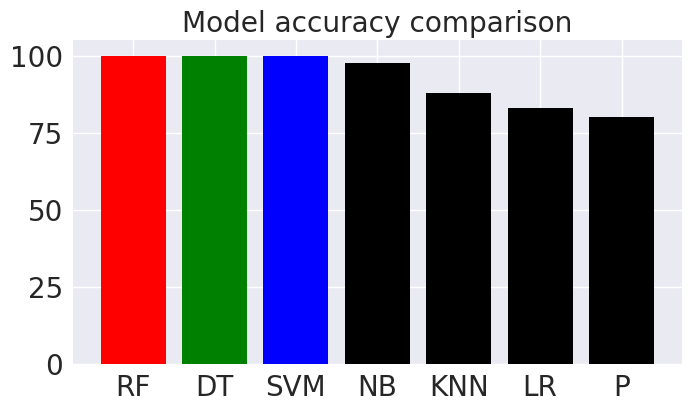

In [43]:
# Comparison of model accuracy
figsize(7, 4)
height = [100.0, 100.0, 99.87, 97.77, 88.04, 82.93, 80.09]
bars = ('RF', 'DT', 'SVM', 'NB', 'KNN', 'LR', 'P')
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color=['red', 'green', 'blue', 'black', 'black', 'black', 'black'])
plt.xticks(y_pos, bars)
plt.title("Model accuracy comparison")
plt.show()


In [69]:
# Defining my own function in python to pass a file that stores output from a model and is able to make 
# predictions on test data
def modelPrediction(model, filename):
    pickle.dump(model, open(filename, 'wb'))
 
    # load the model from disk
    loaded_model = pickle.load(open(filename, 'rb'))
    result = round(loaded_model.score(X_test, y_test)*100, 2)
    print(result)

In [70]:
filename = 'RandomForestModel.sav'
modelPrediction(random_forest, filename)

99.83


In [71]:
filename = 'DecisionTreesModel.sav'
modelPrediction(decision_tree, filename)

99.49


## Function definition and test of various model performance
modelPrediction is a method that takes two arguments into account, model and output file saved from fitting the data. This method allows us to compare predictions of different models.

Model performance comparison on test data shows that Random Forest and/or Decision Trees are pretty close to one another in terms of future predictions. 

# Feature selection for cross-validations
The first half of the analysis focused on understanding the data set; cleaning it; performing EDA, and using machine learning models for making predictions. 

Next we'll focus on feature selection to make our predictions robust. This technique is also known as variable selection, which is a process of selecting a subset of relevant features for use in model construction. 

1. Fature selection helps to avoid collinearity. 
2. With reduced data sets, training times are shorter
3. Helps in simplification of models to make them easier to interpret. 

Feature selection is done for Delta airlines first (UniqueCarrier=2).

In [84]:
# Feature selection for cross-validations
flight_delay_delta = flight_delay_data_copy[(flight_delay_data_copy.UniqueCarrier == 2)]

train_df_dl = flight_delay_delta.drop(['Canceled','SchedElapsedTime','DepDelay'],axis=1)
test_df_dl = flight_delay_delta['Canceled']

In [85]:
# Splitting the dataset into testing (20%) and training (80%) pieces
xdl_train, xdl_test, ydl_train, ydl_test = train_test_split(train_df_dl, test_df_dl, test_size=0.2)

print xdl_train.shape, ydl_train.shape
print xdl_test.shape, ydl_test.shape

(1331, 5) (1331,)
(333, 5) (333,)


In [86]:
# Using logistic regression for Delta airlines 
logreg_dl = LogisticRegression()
logreg_dl.fit(xdl_train, ydl_train)
ydl_pred_lr = logreg_dl.predict(xdl_test)

acc_log_dl = round(logreg_dl.score(xdl_train, ydl_train)*100, 2)
acc_log_dl

89.11

With feature selection, prediction accuracy for Logistic regression improves by ~5%

# Model performance evaluation

### Confusion matrix
One of the methods to evaluate performance of a classification model is to calculate confusion matrix. 
I have used test data for which true values are known.  

Basic terminology used in confusion matrix:
1. True Positives (TP): Cases which were predicted "cancelled" and were indeed cancelled. 
2. True Negatives (TN): Cases which were predicted "not cancelled" and were indeed not cancelled. 
3. False Positives (FP): Cases which were predicted "cancelled" but were actually not cancelled. 
4. False Negatives (FN): Cases which were predicted "not cancelled" but were actually cancelled. 

#### The aim is to minimize the off-diagonal elements, FN and FP. 
In fact for cases like disease prediction for patients, aim should be to have zero tolerance in these off-diagonal elements. 

In [88]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ydl_test, ydl_pred_lr)
print(cm)

[[292   0]
 [ 41   0]]


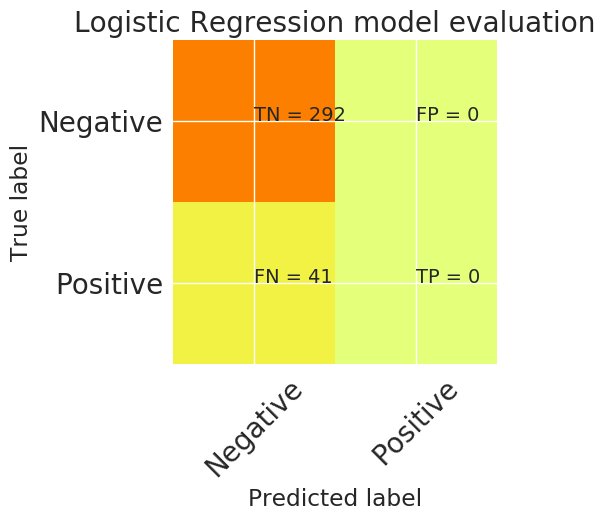

In [96]:
# Plotting confusion matrix for logistic regression model

def plotConfusionMatrix(cm, title_ml):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title(title_ml)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'],['FN','TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

plotConfusionMatrix(cm, 'Logistic Regression model evaluation')

# Accuracy of Logistic Regression model
Accuracy = TP+TN/Total 
         = 301/334
         = 88%

In [90]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Takes model as an input, trains the model, and evaluates it on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(xdl_train, ydl_train)
    
    # Make predictions and evaluate
    model_pred = model.predict(xdl_test)
    model_mae = mae(ydl_test, model_pred)
    
    # Return the performance metric
    return model_mae

In [91]:
lr = LogisticRegression()
lr_mae = fit_and_evaluate(lr)

print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)

Linear Regression Performance on the test set: MAE = 0.1231


It is comforting to find that two key model performance metric agree very well with each other.

# Accuracy of decision tree model

In [92]:
# Decision Tree 
# Variables: xdl_train, ydl_train, xdl_test, ydl_test

decisiontree = DecisionTreeClassifier()
decisiontree.fit(xdl_train, ydl_train)
ydl_pred_dt = decisiontree.predict(xdl_test)
acc_decisiontree = round(decisiontree.score(xdl_train, ydl_train) * 100, 2)
acc_decisiontree

99.85

In [93]:
# Confusion matrix for decision trees
cm_dt = confusion_matrix(ydl_test, ydl_pred_dt)
print(cm_dt)

[[286   6]
 [ 10  31]]


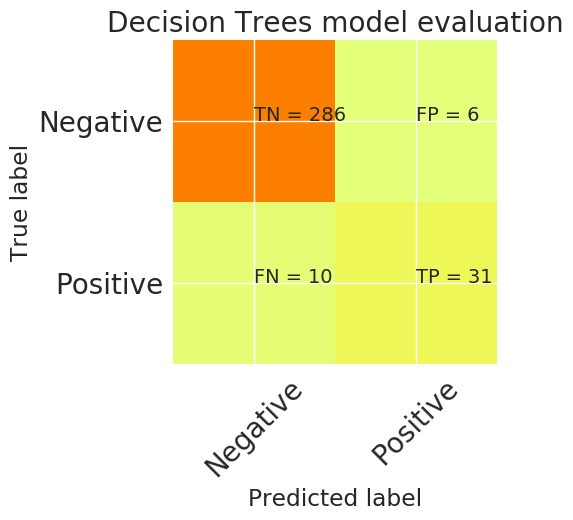

In [97]:
# Calling plotConfusionMatrix method to plot confusion matrix for Decision Trees
plotConfusionMatrix(cm_dt, 'Decision Trees model evaluation')

In [98]:
# Simple function for calculating accuracy percentage based on confusion matrix
from __future__ import division
def cm_eval(cm_num): 
    Total = 0
    for i in range(2):
        for j in range(2):
            Total += cm_num[i][j] 
    
    Accuracy = (cm_num[0][0] + cm_num[1][1])*100/Total
    print('Model Performance on the test set: confusion matrix = %0.1f' % Accuracy)

## Accuracy evaluation for Decision Tress based on confusion matrix

In [99]:
# Calling cm_eval method to assess Decision Trees model  
cm_eval(cm_dt)

Model Performance on the test set: confusion matrix = 95.2


In [101]:
# Mean average error
dt_mae = fit_and_evaluate(decisiontree)

print('Linear Regression Performance on the test set: MAE = %0.4f' % dt_mae)

Linear Regression Performance on the test set: MAE = 0.0450


Once again, it is comforting to find that that accuracy for decision tree model agrees well. 

# Random forest

In [102]:
randomforest = RandomForestClassifier(n_estimators=100)
randomforest.fit(xdl_train, ydl_train)
ydl_pred_rf = randomforest.predict(xdl_test)
randomforest.score(xdl_train, ydl_train)
acc_randomforest = round(randomforest.score(xdl_train, ydl_train) * 100, 2)
acc_randomforest

99.85

In [103]:
# Confusion matrix evaluation for Random forest
cm_rf = confusion_matrix(ydl_test, ydl_pred_rf)
print(cm_rf)

cm_eval(cm_rf)

[[285   7]
 [  5  36]]
Model Performance on the test set: confusion matrix = 96.4


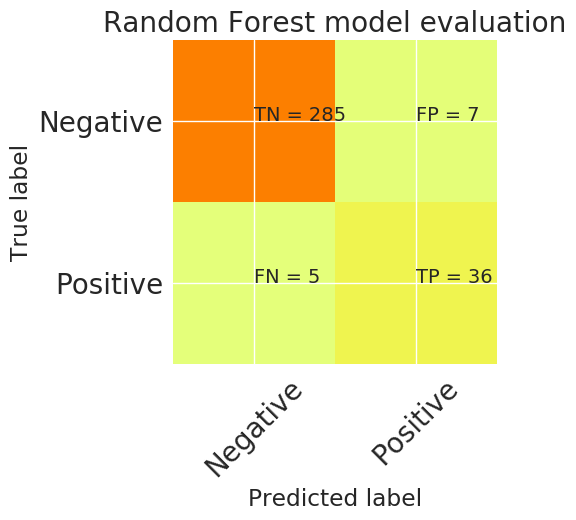

In [104]:
# Calling plotConfusionMatrix method to plot confusion matrix for Random Forest
plotConfusionMatrix(cm_rf, 'Random Forest model evaluation')

In [105]:
# Mean average error
rf_mae = fit_and_evaluate(randomforest)

print('Linear Regression Performance on the test set: MAE = %0.4f' % rf_mae)

Linear Regression Performance on the test set: MAE = 0.0360


# Kernel density plots for various models

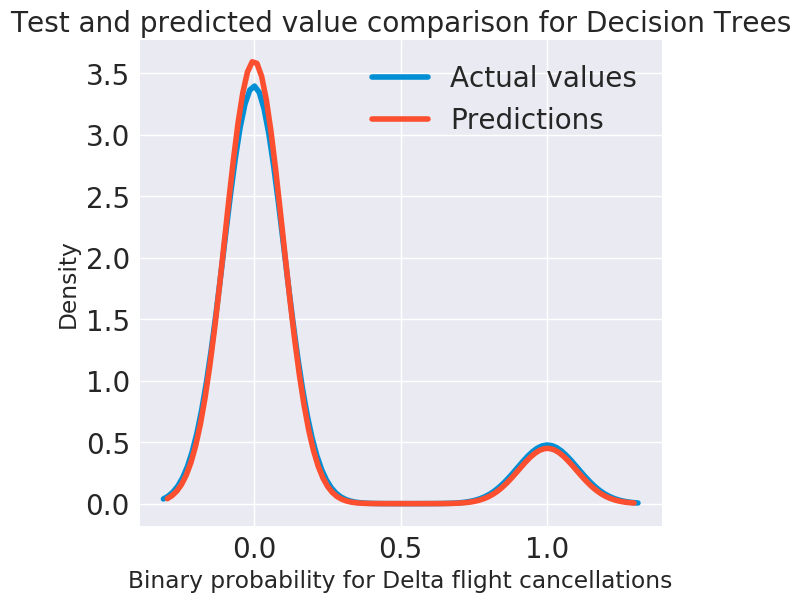

In [107]:
figsize(6,6)

# Density plots of the final predictions and the test values
sns.kdeplot(ydl_test, label = "Actual values")
sns.kdeplot(ydl_pred_dt, label = "Predictions")

# Label the plot
plt.xlabel('Binary probability for Delta flight cancellations'); plt.ylabel('Density');
plt.title('Test and predicted value comparison for Decision Trees');
plt.show()

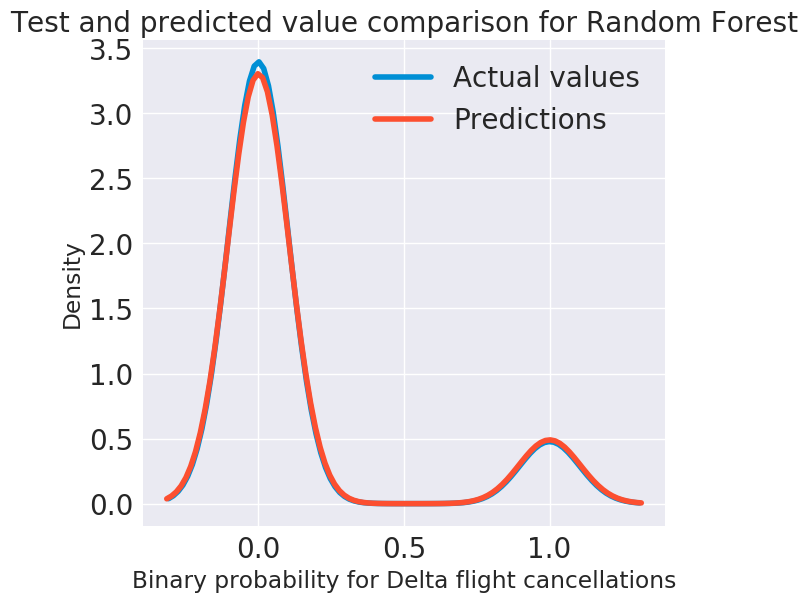

In [108]:
figsize(6,6)

# Density plots of the final predictions and the test values
sns.kdeplot(ydl_test, label = "Actual values")
sns.kdeplot(ydl_pred_rf, label = "Predictions")

# Label the plot
plt.xlabel('Binary probability for Delta flight cancellations'); plt.ylabel('Density');
plt.title('Test and predicted value comparison for Random Forest');
plt.show()

In [109]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

print __version__

1.12.9
